# Flight dataset in 2008
## by Franz Tseng

## Investigation Overview

> The goal is to invastigate the trends or relationship between flights delay as well as the reason of delay with carriers and the airport location.

## Dataset Overview

> The data contains 2389217 rows of data and 29 features about fight information in the year of 2008 in US. While the whole dataset is large, I only analyze the data in 2008.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("flight2008.csv")

## Diversion and Cancellation Rate for Different Carriers

> The percentage of diverted and cancelled flights among different carriers in 2008
> From the above analysis, I found AS has the highest diversion rate and HA has the lowest.The diversion rate for AQ, F9, and, HA are pretty low which are lower than 0.1% while 9E, AA, and AS have diversion rate higher than 0.3%, and that is 3 times higher than that of the lowest group.
<br>
<br>
> The cancellation rate is slightly difference than diversion rate while YV has the highest rate and F9 has the lowest. I noticed that AQ, F9, and HA, the same as the lowest diversion rate group, are the airlines with least frequent concellation. YV, MQ, AA all have cancellation rate higher than 5%(9E is among the highest group, its cancellation rate is slightly lower than 5% though).
<br>
<br>
> In terms of diversion rate and cancellation rate. AA (perhaps 9E) is in the highest frequency group. 

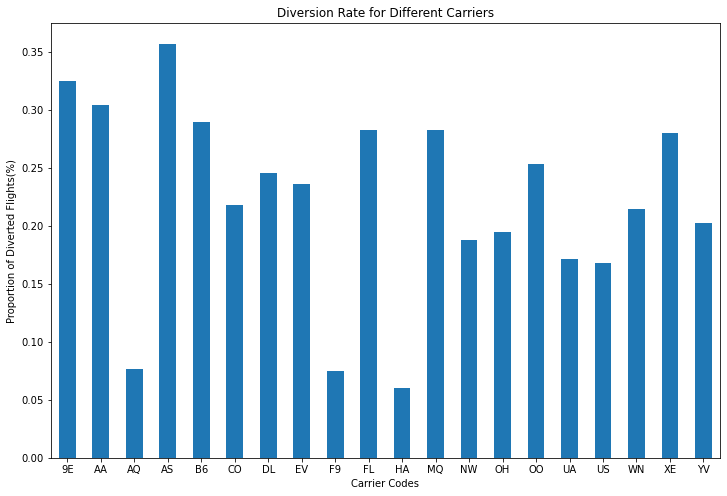

In [3]:
df2 = df.groupby(["UniqueCarrier", "Diverted"]).size().unstack()
df2['proportion'] = (df2[1]/df.UniqueCarrier.value_counts())*100
plt.figure(figsize=[12,8])
plt.title("Diversion Rate for Different Carriers")
df2.proportion.plot(kind='bar')
plt.ylabel("Proportion of Diverted Flights(%)")
plt.xlabel("Carrier Codes")
plt.xticks(rotation=0);

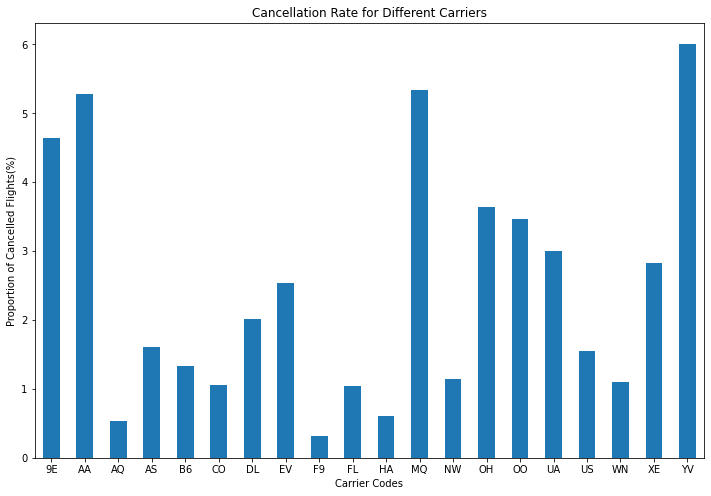

In [4]:
df2 = df.groupby(["UniqueCarrier", "Cancelled"]).size().unstack()
df2['proportion'] = (df2[1]/df.UniqueCarrier.value_counts())*100
plt.figure(figsize=[12,8])
plt.title("Cancellation Rate for Different Carriers")
df2.proportion.plot(kind='bar')
plt.ylabel("Proportion of Cancelled Flights(%)")
plt.xlabel("Carrier Codes")
plt.xticks(rotation=0);

## Cause of Delay for Different Carriers

> Average delay in minutes for different reasons among individual carriers
> The average time for security delay is low. The average delay among all carriers are within 5 minutes.
<br>
> Time delay due to weather is also relatively less, most of the carriers have average weather delay less than 10 minutes.
> "OH" and "EV" have way higher average weather delay than other

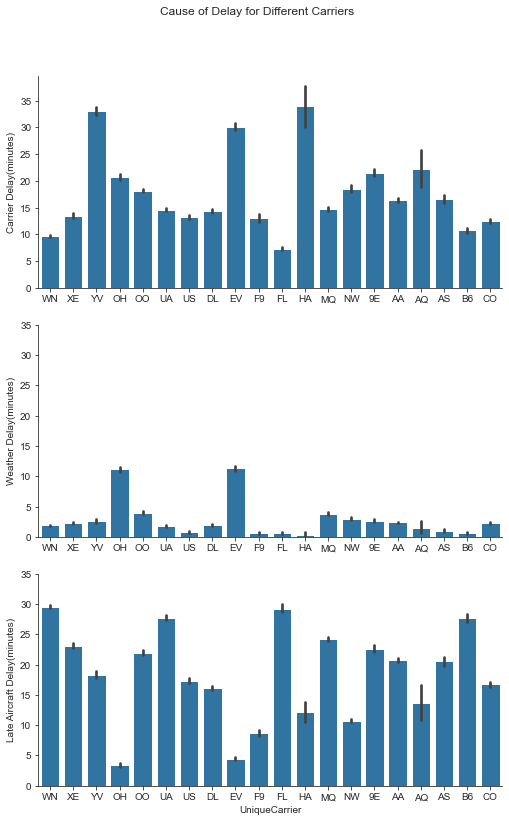

In [15]:
base_color = sb.color_palette()[0]
yticks = np.arange(0, 40, 5)
g = sb.PairGrid(data = df, x_vars = ['UniqueCarrier'],
                y_vars = ['CarrierDelay','WeatherDelay', 'LateAircraftDelay'], 
                aspect=2, height=4, dropna=True, layout_pad=3)
g.map(sb.barplot, color=base_color)
g.set(yticks=yticks, yticklabels=yticks)
g.axes[0,0].yaxis.set_label_text("Carrier Delay(minutes)")
g.axes[1,0].yaxis.set_label_text("Weather Delay(minutes)")
g.axes[2,0].yaxis.set_label_text("Late Aircraft Delay(minutes)")
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelbottom=True)
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Cause of Delay for Different Carriers");

## Complaring Weather Delay and Carrier Delay in Different Airports
> Weather delay is partly related to the location of the airport, however, some carriers have way higher average delay at certain airport in which the average delay among other carriers are much lower. This cannot be fully explained by the fact that certain airport locations tend to have bad weather.
> The two carriers EV and OH have specifically high average weather delay time than other. While OH tend to have weather caused delay in most of the airports, EV has weather delay mostly in Atlanta where it has way more flights than in other airports. That means EV's weather delay is more likely to be due to the location of the airport, but not OH's weather delay.


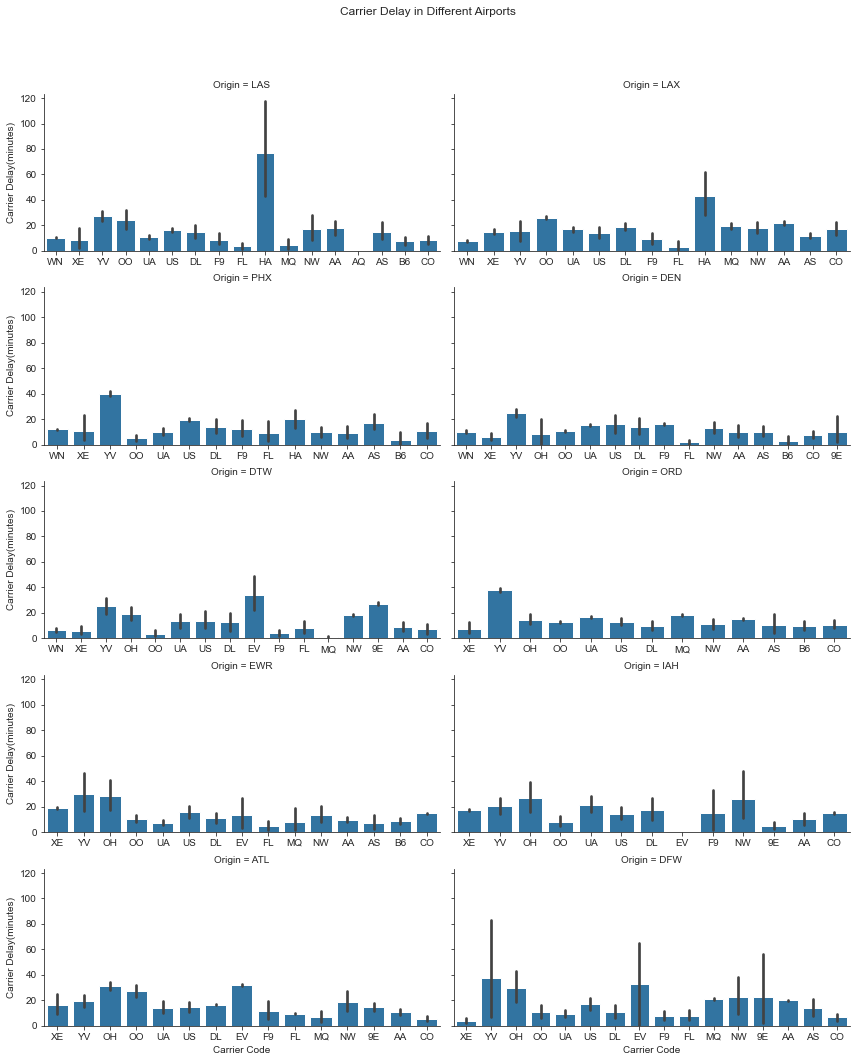

In [39]:
top10_ind = df.Origin.value_counts().head(10).index
top10 = df.loc[df.Origin.isin(top10_ind)]
g = sb.FacetGrid(data=top10, col="Origin", col_wrap=2, margin_titles=True, height=3, aspect=2, sharex=False)
g.map(sb.barplot, "UniqueCarrier", "CarrierDelay")
ylabels = []
for i in [0,2,4,6,8]:
    ylables = ylabels.append(g.axes.flat[i])
for ax in ylabels:
    ax.set_ylabel("Carrier Delay(minutes)")
g.axes[8].set_xlabel("Carrier Code")
g.axes[9].set_xlabel("Carrier Code")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Carrier Delay in Different Airports");

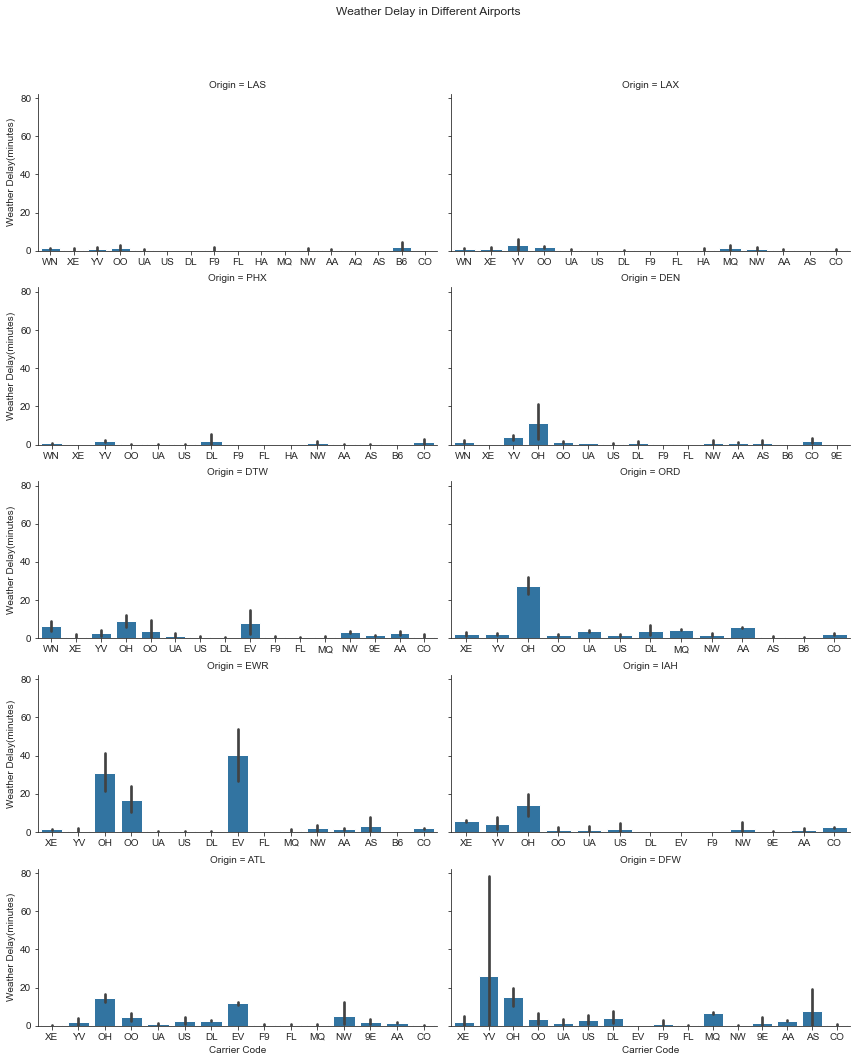

In [40]:
g = sb.FacetGrid(data=top10, col="Origin", col_wrap=2, margin_titles=True, height=3, aspect=2, sharex=False)
g.map(sb.barplot, "UniqueCarrier", "WeatherDelay")
ylabels = []
for i in [0,2,4,6,8]:
    ylables = ylabels.append(g.axes.flat[i])
for ax in ylabels:
    ax.set_ylabel("Weather Delay(minutes)")
g.axes[8].set_xlabel("Carrier Code")
g.axes[9].set_xlabel("Carrier Code")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Weather Delay in Different Airports");

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!